In [111]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import lasso_path
from sklearn.linear_model import lars_path

# 1

In [95]:
dat = pd.read_csv('/Users/zmt/Desktop/Hitters.csv')
# select only numeric columns
dat = dat.iloc[:,[is_numeric_dtype(dat[i]) for i in dat.columns]]
# drop rows with NA
dat = dat.dropna()
dat.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [96]:
X,y=np.array(dat[dat.columns.difference(['Salary'])]),np.array(dat['Salary'])

## 1.1

The remained predictors are: ['Hits', 'HmRun', 'CRBI']


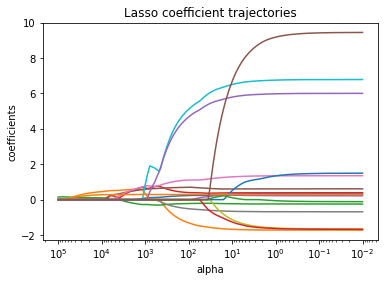

In [128]:
# Lasso coeﬃcient trajectories
n_alphas = 200
alphas = np.logspace(-2, 5, n_alphas)

coefs = []
res=0
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X, y)
    if sum(lasso.coef_!=0)==3 and not res:
        res=1
        print('The remained predictors are:',list(dat.columns[[i for i,x in enumerate(lasso.coef_) if x!=0]]))
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso coeﬃcient trajectories')
plt.axis('tight')
plt.show()

In [107]:
reg = LassoCV(cv=10, random_state=0).fit(X, y)
reg.alpha_

540.6556677332911

In [109]:
lasso = Lasso(alpha=reg.alpha_, fit_intercept=False)
sum(lasso.fit(X, y).coef_!=0)

9

From the results above, we can see that:
* The last 3 predictors are: Hits, HimBun and CRBI.
* Using cross-validation, the optimal value of the regularization penality is 540.66.
* With the optimal value of $\alpha$, 9 predictors left in the model.

## 1.2

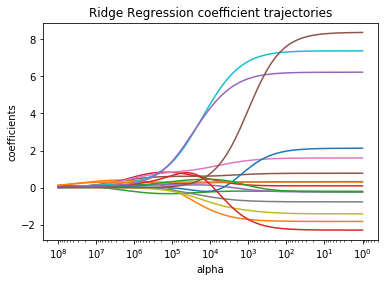

In [115]:
n_alphas = 200
alphas = np.logspace(0, 8, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge Regression coeﬃcient trajectories')
plt.axis('tight')
plt.show()

In [132]:
red = RidgeCV(cv=5).fit(X, y)
red.alpha_

10.0

From the results above, we can see that:
* Using cross-validation, the optimal value of the regularization penality is 10.0.

# 2

The bias-variance tradeoff describes the problem of overfitting and underfitting models. We can think of bias as a quantification of how well a model can fit a training data set. We can think of variance (in this context) as describing how much a model-fit might change upon being trained on new data points. Thus, variance is a quantification of how well a model can generalize to unseen data. Techniques which are more flexible tend to yields models with low bias yet high variance. Conversely, techniques which are less flexible tend to yield models with high bias and low variance.

In the case of ridge regression and LASSO, we use the regularization penalty to explicitly tune the model flexibility described above. With a large penalty parameter, our models becomes less flexible and incur high bias (though likely, low variance). With a small penatly parameter, our model remains flexible, but may have a tendecy to overfit. With reference to the LASSO trajectory plot above, a model with low pentalty (large log(Lambda)) will yield large magnitude coefficients, as the model is flexible enough to fit the training data very well (low bias). 